## import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier,
    VotingClassifier, StackingClassifier)
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

## data collection

In [ ]:
df = pd.read_csv('starbucks.csv')

In [5]:
df.columns = df.columns.str.strip()

# Convert to numeric
cols_to_convert = ["Calories", "Total Fat (g)", "Sugars (g)"]
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in those columns
df = df.dropna(subset=cols_to_convert)

# Create the 'Healthy' column
df.loc[:, "Healthy"] = (
    (df["Calories"] <= 100) &
    (df["Total Fat (g)"] <= 3) &
    (df["Sugars (g)"] <= 10) &
    (df["Protein (g)"] >= 1) &
    (df["Sodium (mg)"] <= 100)
).apply(lambda x: "Healthy" if x else "Unhealthy ")

## data representation 

In [6]:
df

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Healthy
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175,Unhealthy
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260,Unhealthy
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330,Healthy
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410,Healthy
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Whole Milk,350,6.0,3.0,0.2,15,260,70,0,68,6.0,8%,8%,20%,4%,0,Unhealthy
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0,Unhealthy
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0,Unhealthy
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0,Unhealthy


In [7]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Healthy
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175,Unhealthy
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260,Unhealthy
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330,Healthy
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410,Healthy
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75,Healthy


In [8]:
df.tail()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Healthy
236,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Whole Milk,350,6.0,3.0,0.2,15,260,70,0,68,6.0,8%,8%,20%,4%,0,Unhealthy
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0,Unhealthy
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0,Unhealthy
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0,Unhealthy
241,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Grande Nonfat Milk,240,0.1,0.1,0.0,5,230,56,0,55,5.0,8%,0%,15%,0%,0,Unhealthy


In [9]:
df.sample(5)

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Healthy
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,6%,0%,10%,0.00%,varies,Unhealthy
73,Signature Espresso Drinks,Caramel Macchiato,Soymilk,250,7.0,1.5,0.0,5,140,36,1,31,11.0,15%,0%,40%,20%,150,Unhealthy
234,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,240,2.0,0.2,0.0,0,180,51,1,49,3.0,4%,6%,15%,8%,0,Unhealthy
66,Signature Espresso Drinks,Caramel Macchiato,2% Milk,180,5.0,3.0,0.1,20,115,25,0,23,8.0,15%,0%,25%,0%,75,Unhealthy
74,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Short Nonfat Milk,180,3.0,2.0,0.0,5,120,31,0,29,7.0,10%,0%,25%,0%,75,Unhealthy


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 241
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        241 non-null    object 
 1   Beverage                 241 non-null    object 
 2   Beverage_prep            241 non-null    object 
 3   Calories                 241 non-null    int64  
 4   Total Fat (g)            241 non-null    float64
 5   Trans Fat (g)            241 non-null    float64
 6   Saturated Fat (g)        241 non-null    float64
 7   Sodium (mg)              241 non-null    int64  
 8   Total Carbohydrates (g)  241 non-null    int64  
 9   Cholesterol (mg)         241 non-null    int64  
 10  Dietary Fibre (g)        241 non-null    int64  
 11  Sugars (g)               241 non-null    int64  
 12  Protein (g)              241 non-null    float64
 13  Vitamin A (% DV)         241 non-null    object 
 14  Vitamin C (% DV)         241 no

In [11]:
df.describe()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,193.348548,2.903734,1.310788,0.037759,6.390041,128.381743,35.863071,0.804979,32.834025,6.986722
std,102.754009,2.950443,1.642625,0.071484,8.638416,82.101585,20.741713,1.448899,19.669071,4.880120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,180.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.000000,1.000000,43.000000,10.000000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


In [12]:
df.isna().sum()

Beverage_category          0
Beverage                   0
Beverage_prep              0
Calories                   0
Total Fat (g)              0
Trans Fat (g)              0
Saturated Fat (g)          0
Sodium (mg)                0
Total Carbohydrates (g)    0
Cholesterol (mg)           0
Dietary Fibre (g)          0
Sugars (g)                 0
Protein (g)                0
Vitamin A (% DV)           0
Vitamin C (% DV)           0
Calcium (% DV)             0
Iron (% DV)                0
Caffeine (mg)              1
Healthy                    0
dtype: int64

In [13]:
df[df['Caffeine (mg)'].isnull()]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Healthy
158,Shaken Iced Beverages,Iced Brewed Coffee (With Milk & Classic Syrup),2% Milk,90,1.0,0.5,0.0,5,25,18,0,18,2.0,2%,0%,6%,0.00%,NaN,Unhealthy


In [14]:
df.duplicated().sum()

np.int64(0)

## data wrangling

#### drop unrelated column ---->[none]

#### drop duplicated ---->[none]

#### handling missing value

In [15]:
df['Caffeine (mg)'] = pd.to_numeric(df['Caffeine (mg)'],errors='coerce')

In [16]:
df['Caffeine (mg)'].fillna(df['Caffeine (mg)'].mean(),inplace=True)

C:\Users\a\AppData\Local\Temp\ipykernel_13508\3924840206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Caffeine (mg)'].fillna(df['Caffeine (mg)'].mean(),inplace=True)


In [17]:
df[df['Caffeine (mg)'].isnull()]

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Healthy


## data analysis

C:\Users\a\AppData\Local\Temp\ipykernel_13508\897987582.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Beverage_category.index, y=Beverage_category.values, palette='viridis')


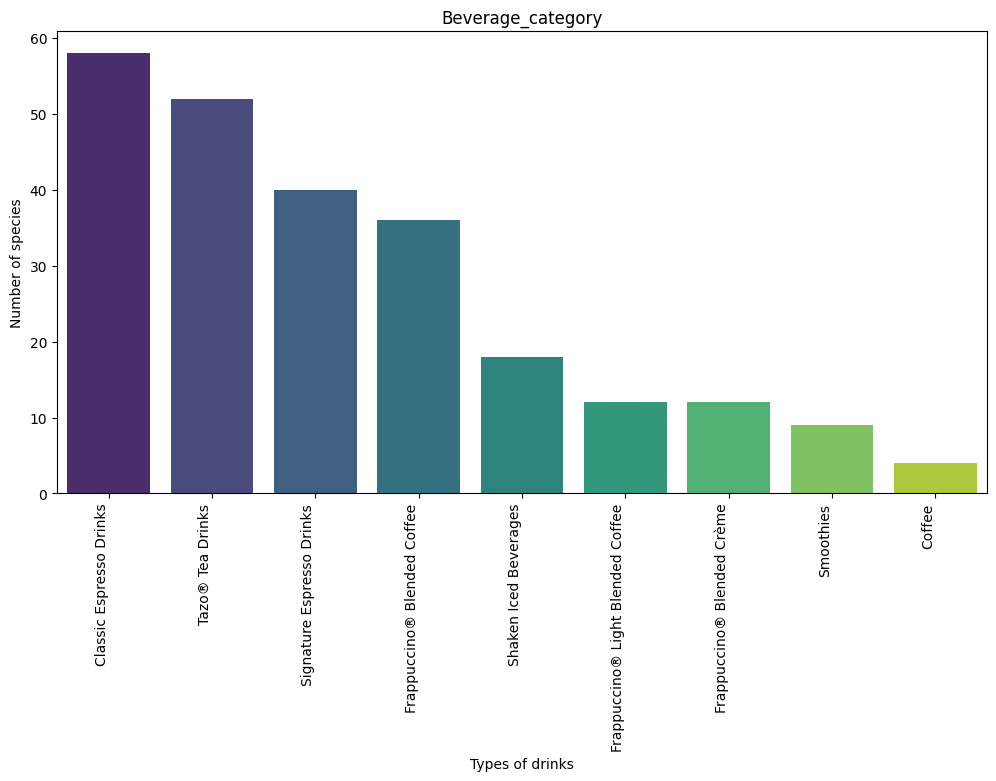

In [104]:
Beverage_category = df['Beverage_category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=Beverage_category.index, y=Beverage_category.values, palette='viridis')
plt.title('Beverage_category')
plt.xlabel('Types of drinks')
plt.ylabel('Number of species')
plt.xticks(rotation=90, ha='right')
plt.show()

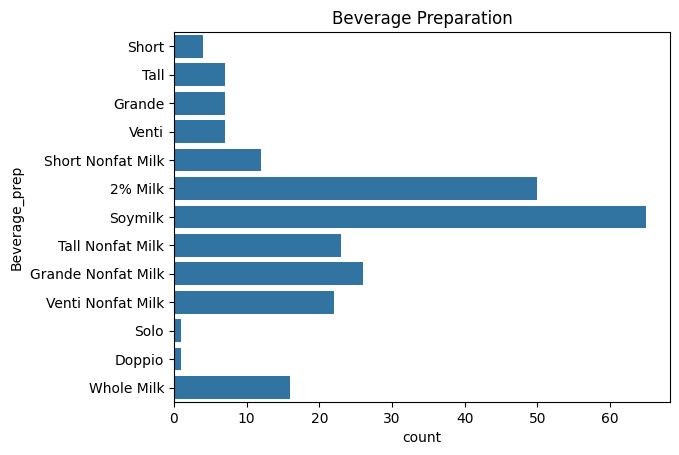

In [105]:
plt.title('Beverage Preparation')
sns.countplot(data=df, y='Beverage_prep')
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_13508\2857694449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Total_Fat_category.index , y=Total_Fat_category.values, palette='rocket')


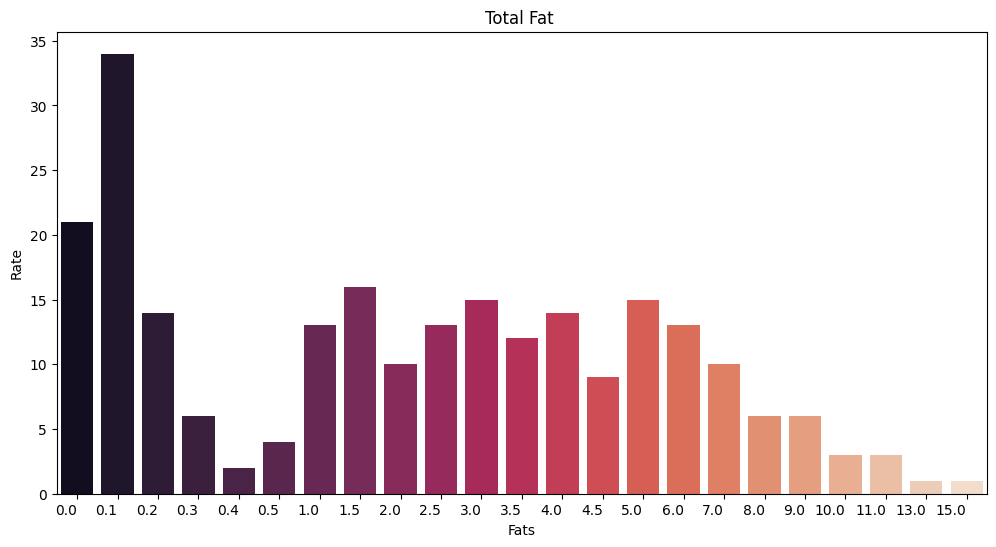

In [106]:
Total_Fat_category=df['Total Fat (g)'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=Total_Fat_category.index , y=Total_Fat_category.values, palette='rocket')
plt.title('Total Fat ')
plt.xlabel('Fats')
plt.ylabel('Rate')
plt.xticks(rotation=0, ha='right')
plt.show()

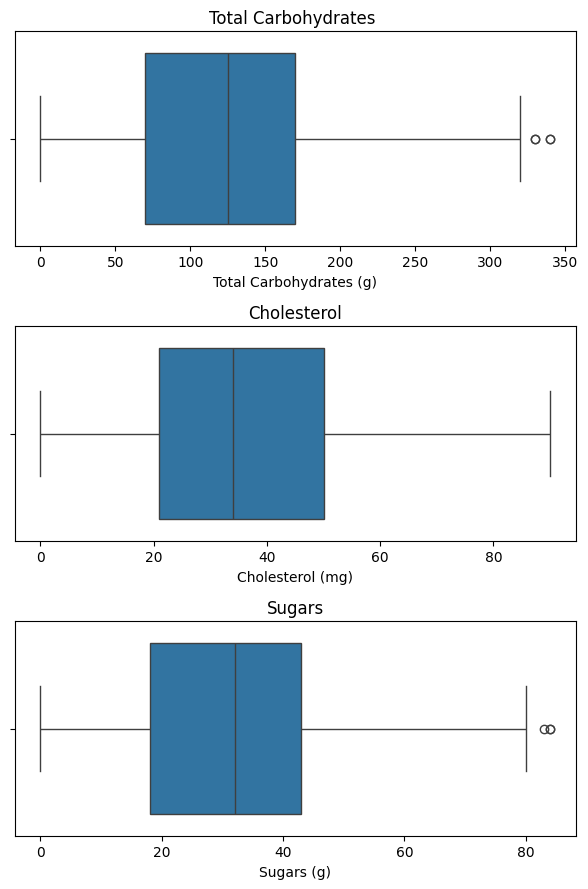

In [107]:
fig, axes = plt.subplots(3, 1, figsize=(6, 9))

sns.boxplot(x=df["Total Carbohydrates (g)"], ax=axes[0])
axes[0].set_title('Total Carbohydrates ')

sns.boxplot(x=df["Cholesterol (mg)"], ax=axes[1])
axes[1].set_title('Cholesterol')

sns.boxplot(x=df["Sugars (g)"], ax=axes[2])
axes[2].set_title('Sugars')

plt.tight_layout()
plt.show()

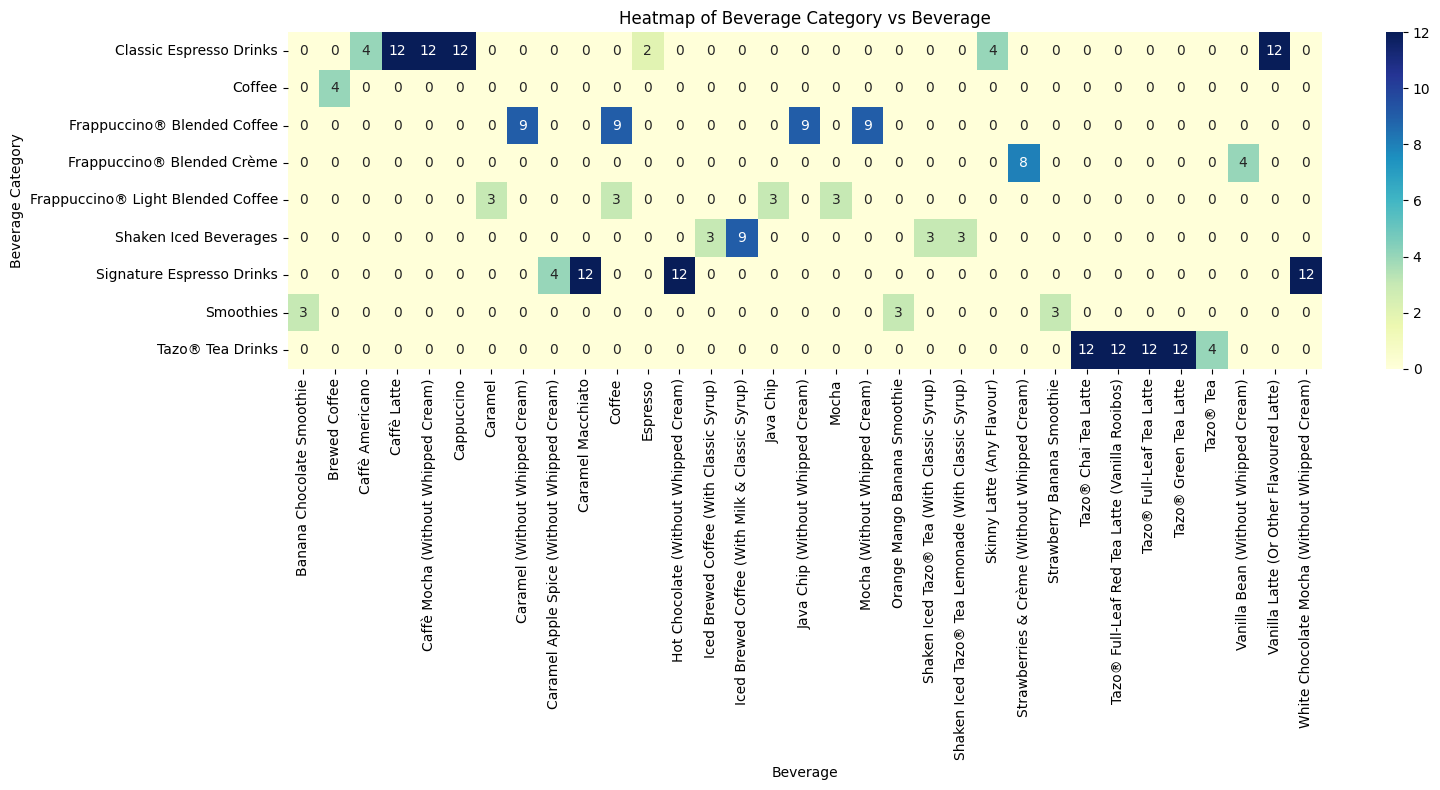

In [108]:
crosstab = pd.crosstab(df['Beverage_category'], df['Beverage'])
plt.figure(figsize=(16, 8))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Beverage Category vs Beverage')
plt.xlabel('Beverage')
plt.ylabel('Beverage Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

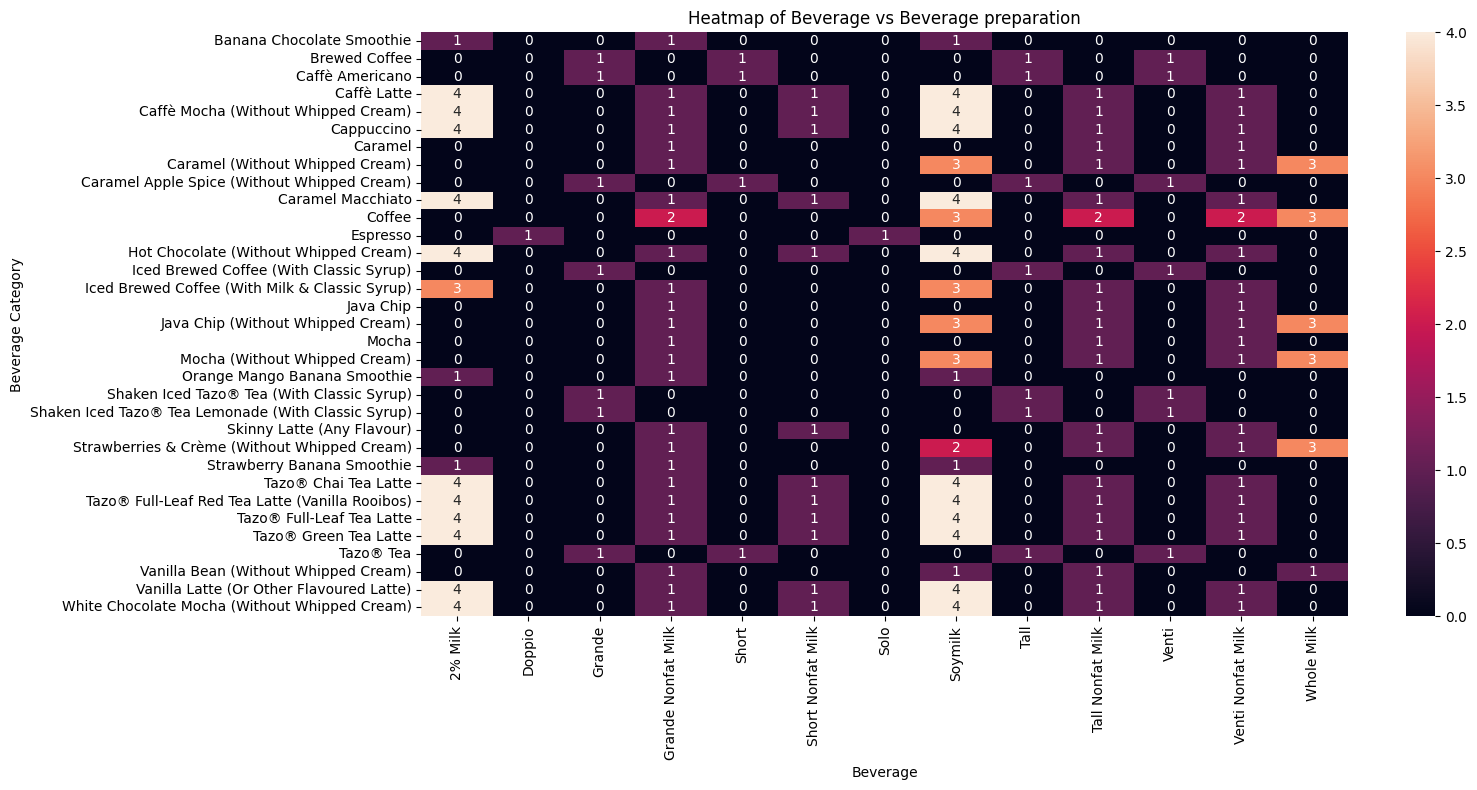

In [109]:
crosstab = pd.crosstab(df['Beverage'], df['Beverage_prep'])
plt.figure(figsize=(16, 8))
sns.heatmap(crosstab, annot=True, fmt='d')
plt.title('Heatmap of Beverage vs Beverage preparation')
plt.xlabel('Beverage')
plt.ylabel('Beverage Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\a\AppData\Local\Temp\ipykernel_13508\4253882517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Beverage_category', y='Calories', data=df, palette='rocket')


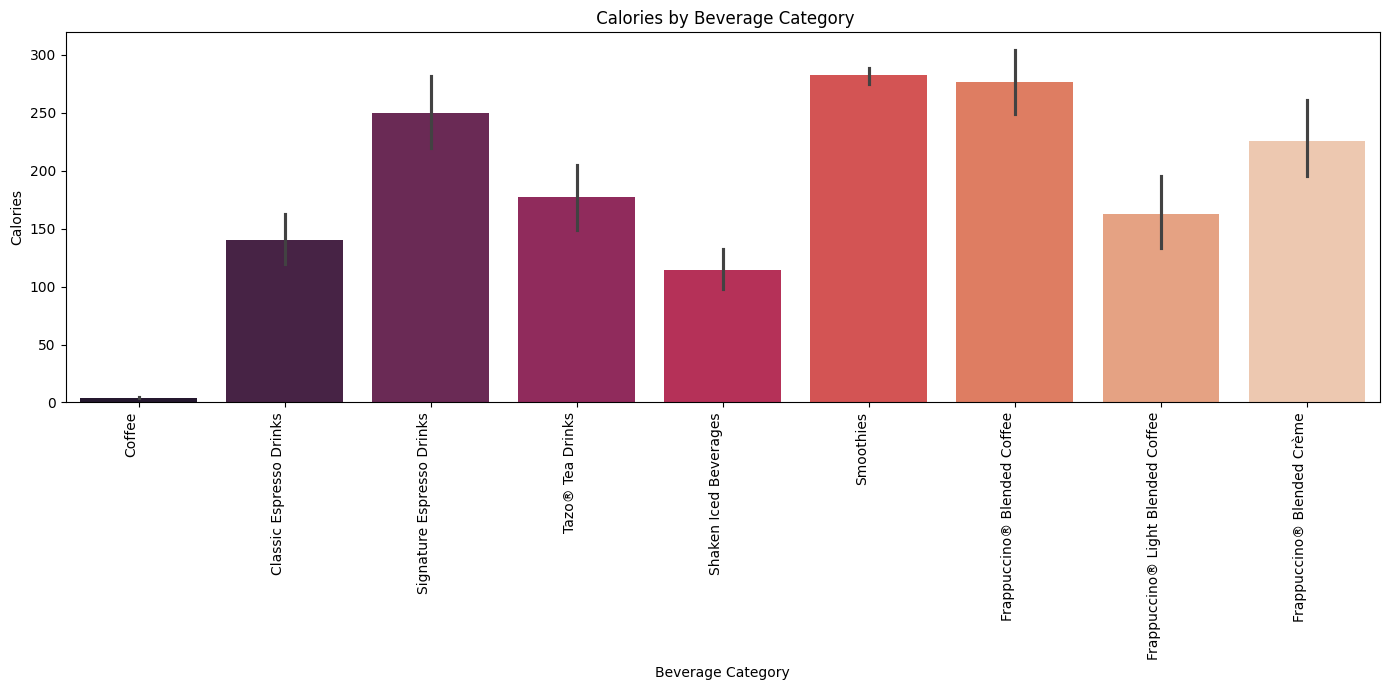

In [110]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Beverage_category', y='Calories', data=df, palette='rocket')

plt.title(' Calories by Beverage Category')
plt.xlabel('Beverage Category')
plt.ylabel('Calories')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

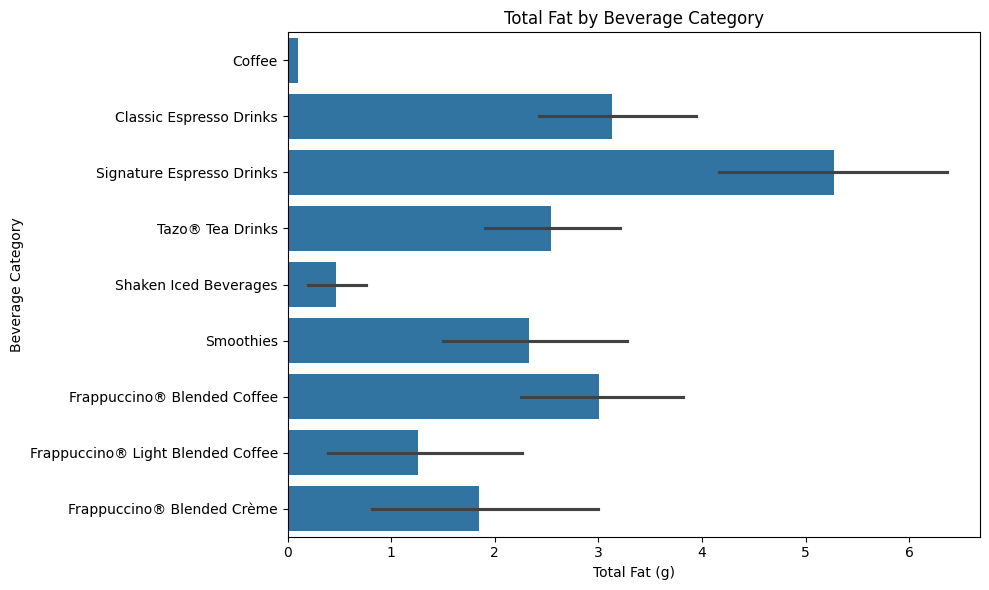

In [111]:
plt.figure(figsize=(10, 6))
plt.title("Total Fat by Beverage Category")
sns.barplot(x='Total Fat (g)', y='Beverage_category', data=df)
plt.xlabel("Total Fat (g)")
plt.ylabel("Beverage Category")
plt.tight_layout()
plt.show()

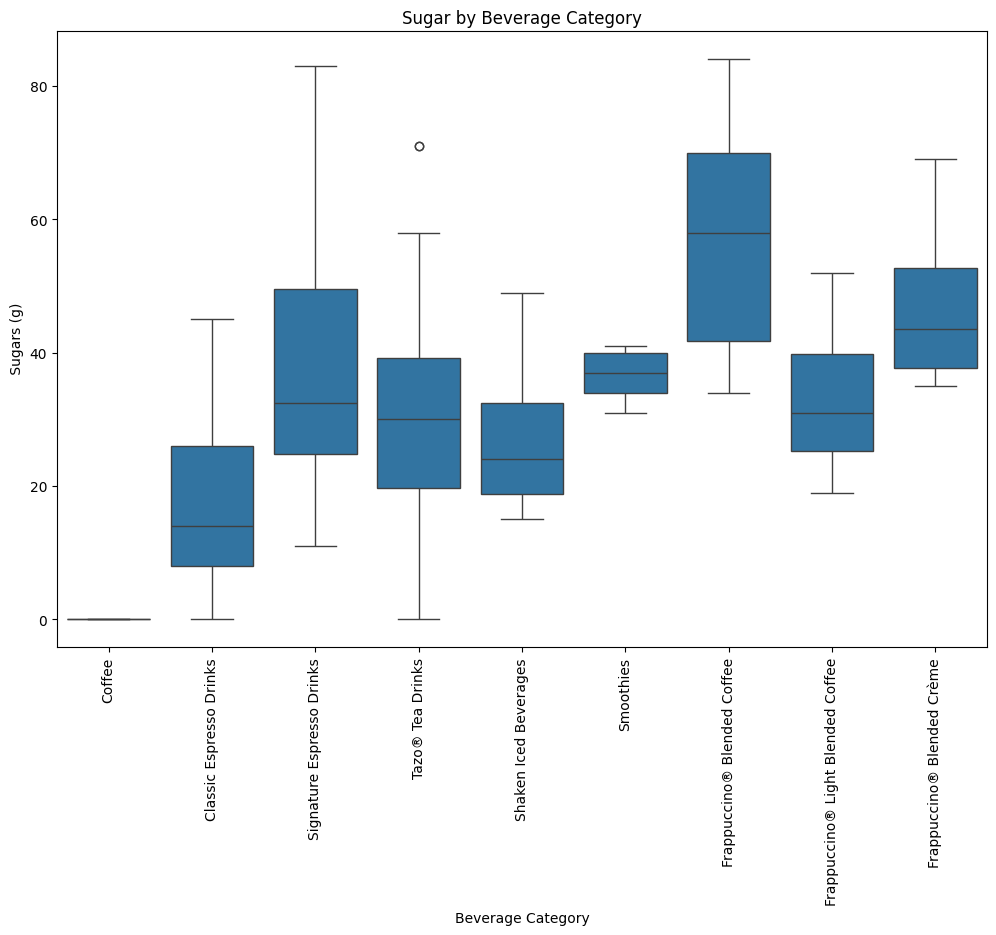

In [112]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Beverage_category', y='Sugars (g)', data=df  )
plt.title('Sugar by Beverage Category')
plt.xlabel('Beverage Category')
plt.ylabel(' Sugars (g)')
plt.xticks(rotation=90)
plt.show()

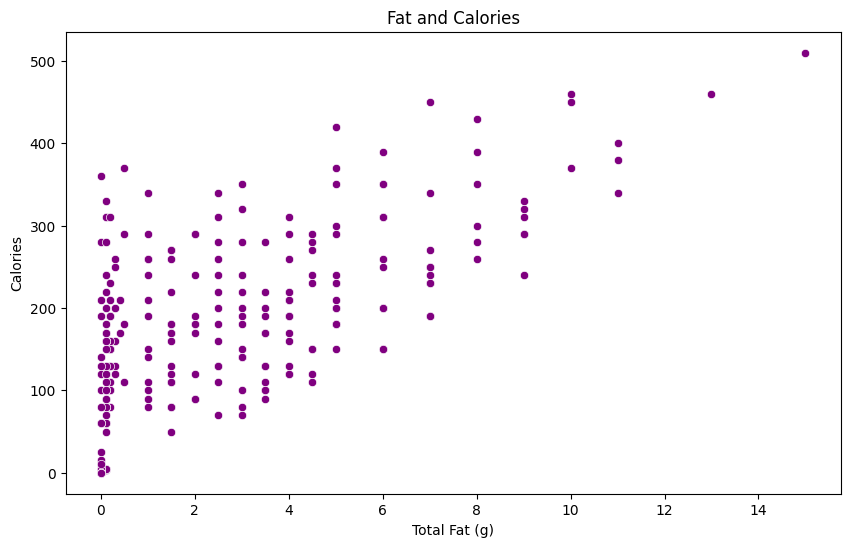

In [113]:
plt.figure(figsize=(10,6))
plt.title("Fat and Calories")
sns.scatterplot(x=df['Total Fat (g)'], y=df['Calories'] , color=('purple'))
plt.show()

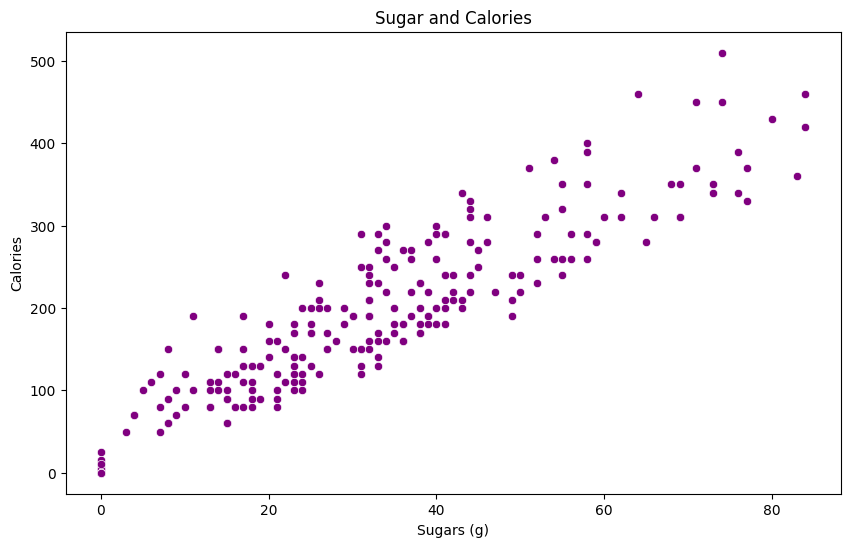

In [114]:
plt.figure(figsize=(10,6))
plt.title("Sugar and Calories")
sns.scatterplot(x=df['Sugars (g)'], y=df['Calories'] , color=('purple'))
plt.show()

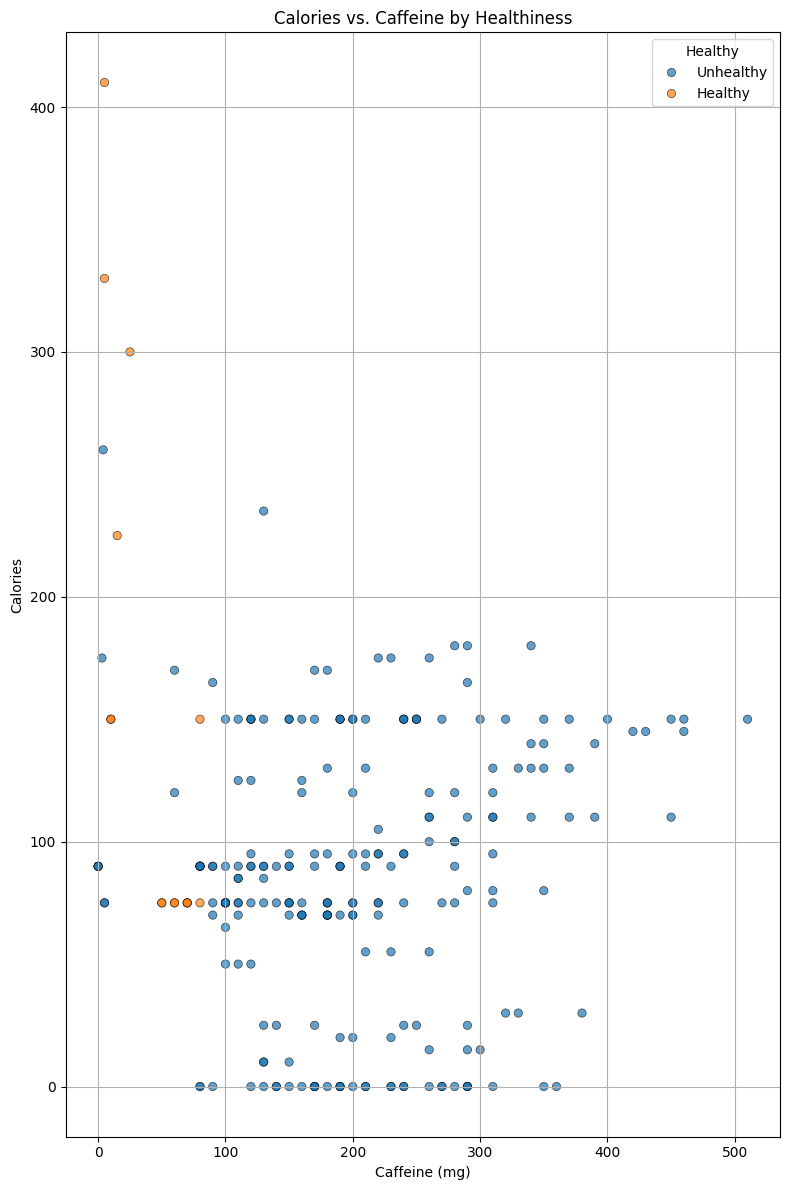

In [115]:
if 'Healthy' not in df.columns:
    df['Healthy'] = df['Calories'].apply(lambda x: 'Healthy' if x < 150 else 'Unhealthy')

# Drop rows with missing values
df_clean = df[['Caffeine (mg)', 'Calories', 'Healthy']].dropna()

# Plot
plt.figure(figsize=(8, 12))
sns.scatterplot(
    data=df_clean,
    x='Calories',
    y='Caffeine (mg)',
    hue='Healthy',
    color='black',
    alpha=0.7,
    edgecolor='k'
)

plt.title('Calories vs. Caffeine by Healthiness')
plt.xlabel('Caffeine (mg)')
plt.ylabel('Calories')
plt.grid(True)
plt.tight_layout()
plt.show()

## data preprocessing

#### define feature X and target Y

In [18]:
X=df.drop(columns='Healthy')
Y=df['Healthy']

In [19]:
X

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175.0
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260.0
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330.0
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410.0
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Whole Milk,350,6.0,3.0,0.2,15,260,70,0,68,6.0,8%,8%,20%,4%,0.0
238,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Tall Nonfat Milk,170,0.1,0.1,0.0,0,160,39,0,38,4.0,6%,0%,10%,0%,0.0
239,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Whole Milk,200,3.5,2.0,0.1,10,160,39,0,38,3.0,6%,0%,10%,0%,0.0
240,Frappuccino® Blended Crème,Vanilla Bean (Without Whipped Cream),Soymilk,180,1.5,0.2,0.0,0,160,37,1,35,3.0,4%,0%,10%,6%,0.0


In [20]:
Y

0      Unhealthy 
1      Unhealthy 
2         Healthy
3         Healthy
4         Healthy
          ...    
236    Unhealthy 
238    Unhealthy 
239    Unhealthy 
240    Unhealthy 
241    Unhealthy 
Name: Healthy, Length: 241, dtype: object

#### data encoding

In [21]:
encoder = LabelEncoder()
X['Beverage_category']=encoder.fit_transform(X['Beverage_category'])
X['Beverage']=encoder.fit_transform(X['Beverage'])
X['Beverage_prep']=encoder.fit_transform(X['Beverage_prep'])
Y=encoder.fit_transform(Y)


In [22]:
df['Healthy'] = df['Healthy'].str.strip()
X.columns = X.columns.str.strip()            # إزالة المسافات الزائدة
X.columns = X.columns.str.replace('\xa0', '')  # إزالة Unicode غير ظاهر


In [23]:
X['Vitamin A (% DV)'] = X['Vitamin A (% DV)'].str.replace('%', '',regex=False).astype(float)
X['Vitamin C (% DV)'] = X['Vitamin C (% DV)'].str.replace('%', '',regex=False).astype(float)
X['Calcium (% DV)'] = X['Calcium (% DV)'].str.replace('%', '',regex=False).astype(float)
X['Iron (% DV)'] = X['Iron (% DV)'].str.replace('%', '',regex=False).astype(float)


In [24]:
X.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,1,1,4,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,1,1,8,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0
2,1,1,2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0
3,1,1,10,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0
4,0,3,5,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0


#### data scalling

In [25]:
features_to_scale = [
    'Beverage_category','Beverage','Beverage_prep', 'Calories', 'Total Fat (g)', 'Trans Fat (g)', 
    'Saturated Fat (g)', 'Sodium (mg)', 'Total Carbohydrates (g)', 
    'Cholesterol (mg)', 'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)',
    'Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)',
    'Caffeine (mg)'
]

In [26]:
scaler = MinMaxScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])


In [27]:
X.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,0.125,0.03125,0.333333,0.005882,0.006667,0.000000,0.0,0.000,0.014706,0.000000,0.0,0.000000,0.015,0.0,0.0,0.000000,0.0,0.426829
1,0.125,0.03125,0.666667,0.007843,0.006667,0.000000,0.0,0.000,0.029412,0.000000,0.0,0.000000,0.025,0.0,0.0,0.000000,0.0,0.634146
2,0.125,0.03125,0.166667,0.009804,0.006667,0.000000,0.0,0.000,0.029412,0.000000,0.0,0.000000,0.050,0.0,0.0,0.000000,0.0,0.804878
3,0.125,0.03125,0.833333,0.009804,0.006667,0.000000,0.0,0.000,0.029412,0.000000,0.0,0.000000,0.050,0.0,0.0,0.033333,0.0,1.000000
4,0.000,0.09375,0.416667,0.137255,0.006667,0.011111,0.0,0.125,0.220588,0.111111,0.0,0.107143,0.300,0.2,0.0,0.333333,0.0,0.182927


#### data splitting

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=50)

## data modeling

#### LogisticRegression

In [ ]:
lg=LogisticRegression()
lg.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
Y_pred=lg.predict(X_test)

In [71]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 0.9591836734693877

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98        49

    accuracy                           0.96        49
   macro avg       0.50      0.48      0.49        49
weighted avg       1.00      0.96      0.98        49


Confusion Matrix:
 [[ 0  0]
 [ 2 47]]

precision_score: 0.5



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### SVC

In [32]:
svc=SVC(C=0.5,kernel='rbf')
svc.fit(X_train,Y_train)

,C,0.5
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [33]:
Y_pred=svc.predict(X_test)

In [72]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 0.9591836734693877

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98        49

    accuracy                           0.96        49
   macro avg       0.50      0.48      0.49        49
weighted avg       1.00      0.96      0.98        49


Confusion Matrix:
 [[ 0  0]
 [ 2 47]]

precision_score: 0.5



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### Linear_SVC

In [35]:
linear_svc = LinearSVC(C=0.5)
linear_svc.fit(X_train, Y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,0.5
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [36]:
Y_pred=linear_svc.predict(X_test)

In [73]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 0.9591836734693877

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98        49

    accuracy                           0.96        49
   macro avg       0.50      0.48      0.49        49
weighted avg       1.00      0.96      0.98        49


Confusion Matrix:
 [[ 0  0]
 [ 2 47]]

precision_score: 0.5



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### KNeighborsClassifier

In [74]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [75]:
Y_pred=knn.predict(X_test)

In [76]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 0.9387755102040817

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.94      0.97        49

    accuracy                           0.94        49
   macro avg       0.50      0.47      0.48        49
weighted avg       1.00      0.94      0.97        49


Confusion Matrix:
 [[ 0  0]
 [ 3 46]]

precision_score: 0.5



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### DecisionTreeClassifier

In [77]:
tree=DecisionTreeClassifier()
tree.fit(X_train,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [78]:
Y_pred=tree.predict(X_test)

In [79]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        49

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Confusion Matrix:
 [[49]]

precision_score: 1.0



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


#### BaggingClassifier

In [80]:
bg=BaggingClassifier()
bg.fit(X_train,Y_train)

,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,None
,verbose,0


In [81]:
Y_pred=bg.predict(X_test)

In [82]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        49

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Confusion Matrix:
 [[49]]

precision_score: 1.0



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


#### RandomForestClassifier

In [83]:
rd=RandomForestClassifier()
rd.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [84]:
Y_pred=rd.predict(X_test)

In [85]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 0.9795918367346939

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99        49

    accuracy                           0.98        49
   macro avg       0.50      0.49      0.49        49
weighted avg       1.00      0.98      0.99        49


Confusion Matrix:
 [[ 0  0]
 [ 1 48]]

precision_score: 0.5



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### ExtraTreesClassifier

In [86]:
ec=ExtraTreesClassifier()
ec.fit(X_train,Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [87]:
Y_pred=ec.predict(X_test)

In [88]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 0.9795918367346939

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99        49

    accuracy                           0.98        49
   macro avg       0.50      0.49      0.49        49
weighted avg       1.00      0.98      0.99        49


Confusion Matrix:
 [[ 0  0]
 [ 1 48]]

precision_score: 0.5



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### VotingClassifier

In [89]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
vc = VotingClassifier(estimators=[
    ('lr', clf1),
    ('dt', clf2),
    ('rf', clf3)
], voting='soft')
vc.fit_transform(X_train,Y_train)

array([[0.106382  , 0.893618  , 0.        , 1.        , 0.        ,
        1.        ],
       [0.02115481, 0.97884519, 0.        , 1.        , 0.        ,
        1.        ],
       [0.00534934, 0.99465066, 0.        , 1.        , 0.        ,
        1.        ],
       ...,
       [0.00548731, 0.99451269, 0.        , 1.        , 0.        ,
        1.        ],
       [0.06088455, 0.93911545, 0.        , 1.        , 0.        ,
        1.        ],
       [0.00391663, 0.99608337, 0.        , 1.        , 0.        ,
        1.        ]], shape=(192, 6))

In [90]:
Y_pred=vc.predict(X_test)

In [91]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        49

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Confusion Matrix:
 [[49]]

precision_score: 1.0



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


#### StackingClassifier

In [92]:
sc = StackingClassifier(estimators=[
    ('lr', clf1),
    ('dt', clf2),
    ('rf', clf3)
], final_estimator=LogisticRegression())
sc.fit(X_train,Y_train)

,estimators,"[('lr', ...), ('dt', ...), ...]"
,final_estimator,LogisticRegression()
,cv,None
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [93]:
Y_pred=sc.predict(X_test)

In [94]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        49

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Confusion Matrix:
 [[49]]

precision_score: 1.0



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


#### XGBClassifier

In [95]:
xgb = XGBClassifier(
    use_label_encoder=False,   
    eval_metric='logloss', 
    random_state=42,
    verbosity=0 
)
xgb.fit(X_train, Y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [96]:
Y_pred=xgb.predict(X_test)

In [97]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 0.9795918367346939

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99        49

    accuracy                           0.98        49
   macro avg       0.50      0.49      0.49        49
weighted avg       1.00      0.98      0.99        49


Confusion Matrix:
 [[ 0  0]
 [ 1 48]]

precision_score: 0.5



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


#### CatBoostClassifier

In [98]:
cc=CatBoostClassifier(verbose=0)
cc.fit(X_train,Y_train)

In [99]:
Y_pred=vc.predict(X_test)

In [100]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        49

    accuracy                           1.00        49
   macro avg       1.00      1.00      1.00        49
weighted avg       1.00      1.00      1.00        49


Confusion Matrix:
 [[49]]

precision_score: 1.0



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


#### LGBMClassifier

In [101]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 177, number of negative: 15
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 192, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.921875 -> initscore=2.468100
[LightGBM] [Info] Start training from score 2.468100
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [102]:
Y_pred=lgbm.predict(X_test)

In [103]:
print(f'accuracy= {accuracy_score(Y_test,Y_pred)}')
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print(f'\nprecision_score: {precision_score(Y_test, Y_pred, average='macro')}\n')

accuracy= 0.9591836734693877

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.96      0.98        49

    accuracy                           0.96        49
   macro avg       0.50      0.48      0.49        49
weighted avg       1.00      0.96      0.98        49


Confusion Matrix:
 [[ 0  0]
 [ 2 47]]

precision_score: 0.5



e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\download\pythone\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
